In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
heuristictime = np.loadtxt('heuristictime.txt')
ilptime = np.loadtxt('ILPtimelist.txt')
adptime = np.loadtxt('ADPtimelist.txt')
adptime_copy = adptime.copy()
for i in range(len(adptime)):
    adptime_copy[i] = adptime[i]*10
np.savetxt('ADPtimelist_2.txt', adptime_copy)

In [7]:
heuristictime = np.loadtxt('heuristictime.txt')
ilptime = np.loadtxt('ILPtimelist.txt')
adptime = np.loadtxt('ADPtimelist_2.txt')
adptime


array([1262.86455154, 2159.58792448, 3470.41901112, 5581.07221127,
       7328.7859726 ])

In [3]:
# 读取所有以episode_statistics_adp0_demandintense为前缀的Excel文件
import glob
weights = [0.1,0.3,0.5,0.7,0.9,1.0]
file_pattern_list = []
for weight in weights:
    file_pattern_list.append(f'results/timerequement/episode_statistics_adp0_demandrandom_*.xlsx')

file_pattern0 = 'results/timerequement/episode_statistics_adp0_demandrandom_*.xlsx'
file_pattern01 = 'results/timerequement/episode_statistics_adp0.1_demandrandom_*.xlsx'
matching_files0 =  glob.glob(file_pattern0)
matching_files_0_1 =  glob.glob(file_pattern01)
matching_files0[:5]
heuresultdata = []
for i in range(5):
    df = pd.read_excel(matching_files0[i])
    heuresultdata.append(df)
ilpresultdata = []
for i in range(5,10):
    df = pd.read_excel(matching_files0[i])
    ilpresultdata.append(df)
adpresultdata = []
for i in matching_files_0_1:
    df = pd.read_excel(i)
    adpresultdata.append(df)

In [13]:
len(adpresultdata)

5

In [20]:
compare_list = ['episode_reward','completed_orders','rejected_orders', 'avg_request_value', 'avg_battery_level', 'finished_charge']
episode_reward_list = []
avg_battery_level_list = []
num = 0
for i in range(5):
    result = ""
    data = heuresultdata[i]
    result+= str(num)+"&H&" +str((num+1)*5)+"&"
    result+= str(np.round(heuristictime[i],2))+" & "
    for item in compare_list:
        if item in data.columns:
            if item == 'avg_battery_level':
                avg_battery_level_list.append(data[item].mean())
            if item == 'episode_reward':
                episode_reward_list.append(data[item].mean())
            result += f"{data[item].mean():.2f} & "
        else:
            result += "- & "
    result += "\\\\"
    print(result)
    num +=1
for i in range(5):
    result = ""
    data = ilpresultdata[i]
    result+= str(num)+"&I&" +str((num-4)*5)+"&"
    result+= str(np.round(ilptime[i],2))+" & "
    for item in compare_list:
        if item in data.columns:
            if item == 'avg_battery_level':
                avg_battery_level_list.append(data[item].mean())
            if item == 'episode_reward':
                episode_reward_list.append(data[item].mean())
            result += f"{data[item].mean():.2f} & "
        else:
            result += "- & "
    result += "\\\\"
    print(result)
    num +=1
for i in range(5):
    result = ""
    data = adpresultdata[i][adpresultdata[i]['neural_network_loss']> 0]
    result+= str(num)+"&A&"+str((num-9)*5)+"&"
    result+= str(np.round(adptime[i],2))+" & "
    for item in compare_list:
        if item in data.columns:
            if item == 'avg_battery_level':
                avg_battery_level_list.append(data[item].mean())
            if item == 'episode_reward':
                episode_reward_list.append(data[item].mean())
            result += f"{data[item].mean():.2f} & "
        else:
            result += "- & "
    result += "\\\\"
    print(result)
    num +=1
    

0&H&5&19.06 & 446.40 & 16.55 & 79.82 & 72.36 & 0.73 & 26.45 & \\
1&H&10&51.17 & 1691.84 & 31.28 & 152.04 & 102.94 & 0.69 & 56.34 & \\
2&H&15&115.34 & 3555.74 & 47.02 & 246.65 & 128.29 & 0.68 & 84.42 & \\
3&H&20&224.28 & 6023.85 & 60.88 & 321.91 & 155.77 & 0.67 & 112.09 & \\
4&H&25&397.72 & 8977.81 & 74.87 & 435.75 & 182.55 & 0.68 & 138.15 & \\
5&I&5&44.14 & 1290.79 & 18.76 & 92.58 & 79.60 & 0.82 & 28.74 & \\
6&I&10&136.6 & 3936.23 & 37.65 & 175.84 & 116.29 & 0.80 & 62.16 & \\
7&I&15&356.54 & 7644.64 & 55.50 & 293.74 & 152.99 & 0.79 & 92.74 & \\
8&I&20&574.39 & 12627.11 & 73.58 & 385.20 & 189.87 & 0.79 & 125.17 & \\
9&I&25&942.79 & 18800.18 & 90.91 & 493.08 & 228.73 & 0.79 & 155.63 & \\
10&A&5&1262.86 & 1806.03 & 35.12 & 3.62 & 58.60 & 0.70 & 77.25 & \\
11&A&10&2159.59 & 7156.76 & 95.67 & 2.33 & 83.93 & 0.61 & 128.22 & \\
12&A&15&3470.42 & 15081.66 & 142.56 & 2.22 & 110.51 & 0.58 & 168.00 & \\
13&A&20&5581.07 & 22997.19 & 200.10 & 2.50 & 131.18 & 0.53 & 244.40 & \\
14&A&25&7328.79 & 398

In [11]:
weights = [0.2+i*0.05 for i in range(7)]
weights[2] = 0.3
weights[3] = 0.35
weights

[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

In [12]:
# 读取所有以episode_statistics_adp0_demandrandom为前缀的Excel文件
import glob
weights = weights
file_pattern_list = []
for weight in weights:
    file_pattern_list.append(f'results/integrated_tests_h/episode_statistics_adp0_demandintense_{weight}_*.xlsx')


matching_files_list = []
for file_pattern in file_pattern_list:
    matching_files = glob.glob(file_pattern)
    matching_files_list.append(matching_files)

data_list = []
for matching_files in matching_files_list:
    adp = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
    data_list.append(adp)

compare_list = ['episode_reward','completed_orders','rejected_orders', 'avg_request_value', 'avg_battery_level', 'finished_charge']
episode_reward_list = []
avg_battery_level_list = []
num = 0
for i in range(len(data_list)):
    result = ""
    data = data_list[i]
    result+= str(num+7)+" & H&"
    result+= str(weights[i])+" & "
    for item in compare_list:
        if item in data_list[0].columns:
            if item == 'avg_battery_level':
                avg_battery_level_list.append(data[item].mean())
            if item == 'episode_reward':
                episode_reward_list.append(data[item].mean())
            result += f"{data[item].mean():.2f} & "
        else:
            result += "- & "
    result += "\\\\"
    print(result)
    num +=1

7 & H&0.2 & 401.52 & 37.98 & 168.69 & 51.71 & 0.49 & 40.71 & \\
8 & H&0.25 & 544.44 & 37.93 & 171.59 & 51.84 & 0.52 & 42.05 & \\
9 & H&0.3 & 467.74 & 36.36 & 170.81 & 52.12 & 0.62 & 47.90 & \\
10 & H&0.35 & 454.39 & 35.92 & 166.19 & 51.91 & 0.63 & 48.92 & \\
11 & H&0.4 & 443.67 & 35.59 & 165.91 & 52.15 & 0.63 & 50.08 & \\
12 & H&0.45 & 419.80 & 35.01 & 167.03 & 52.18 & 0.62 & 50.90 & \\
13 & H&0.5 & 415.19 & 33.28 & 162.16 & 52.57 & 0.71 & 56.75 & \\


In [13]:
# 读取所有以episode_statistics_adp0_demandintense为前缀的Excel文件
import glob
weights = [0.1,0.3,0.5,0.7,0.9,1.0]
file_pattern_list = []
for weight in weights:
    file_pattern_list.append(f'results/integrated_tests/episode_statistics_adp{weight}_demandintense_*.xlsx')

file_pattern0 = 'results/integrated_tests/episode_statistics_adp0_demandintense_*.xlsx'
matching_files0 =  glob.glob(file_pattern0)

adp_0 = pd.read_excel(matching_files0[0], sheet_name='Episode_Statistics')


# file_pattern_0_1 = 'results/results_9_25/integrated_tests/episode_statistics_adp0.1_demandintense_*.xlsx'
file_pattern_heuristic = 'results/integrated_tests_h/episode_statistics_adp0_demandintense_0.25_*.xlsx'

matching_files_list = []
for file_pattern in file_pattern_list:
    matching_files = glob.glob(file_pattern)
    matching_files_list.append(matching_files)

data_list = []
for matching_files in matching_files_list:
    adp = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
    data_list.append(adp)

matching_files_heuristic = glob.glob(file_pattern_heuristic)

# adp_0 = pd.read_excel(matching_files[0], sheet_name='Episode_Statistics')
# adp_0_1 = pd.read_excel(matching_files_0_1[0], sheet_name='Episode_Statistics')
adp_h = pd.read_excel(matching_files_heuristic[0], sheet_name='Episode_Statistics')

In [14]:
len(data_list)

6

In [15]:
compare_list = ['episode_reward','completed_orders','rejected_orders', 'avg_request_value', 'avg_battery_level', 'finished_charge', 
                'sample_assign_q_value', 'sample_charge_q_value', 'sample_idle_q_value',]

In [16]:
episode_reward_list = []
num = 0
for i in range(len(data_list)+2):
    if i ==0:
        result = ""
        data = adp_h
        result+= str(num)+" & "
        result+= "- & "
        for item in compare_list:
            if item in data_list[0].columns:
                result += f"{data[item].mean():.2f} & "
            else:
                result += "- & "
        result += "\\\\"
        print(result)
        num +=1
    elif i ==1:
        result = ""
        data = adp_0
        result+= str(num)+" & "
        result+= "0 & "
        for item in compare_list:
            if item in data_list[0].columns:
                result += f"{data[item].mean():.2f} & "
            else:
                result += "- & "
        result += "\\\\"
        print(result)
        num +=1
    else:
        result  = ""
        result+= str(num)+" & "
        result+=str(weights[i-2])
        result += " & "
        data = data_list[i-2]
        data = data[data['neural_network_loss']>0]
        for item in compare_list:
            if item in data_list[0].columns:
                result += f"{data[item].mean():.2f} & "
            else:
                result += "- & "
        result += "\\\\"
        episode_reward_list.append(data['episode_reward'].mean())
        print(result)
        num +=1

0 & - & 544.44 & 37.93 & 171.59 & 51.84 & 0.52 & 42.05 & 0.00 & 0.00 & 0.00 & \\
1 & 0 & 1733.96 & 34.90 & 177.48 & 55.70 & 0.80 & 61.99 & 0.00 & 0.00 & 0.00 & \\
2 & 0.1 & 3704.70 & 86.90 & 0.67 & 43.26 & 0.64 & 133.51 & 4.44 & -0.74 & -18.17 & \\
3 & 0.3 & 3707.40 & 87.42 & 0.82 & 43.17 & 0.65 & 131.30 & 4.55 & -0.13 & -16.06 & \\
4 & 0.5 & 3782.90 & 89.21 & 0.91 & 43.09 & 0.65 & 122.72 & 2.07 & -1.42 & -34.98 & \\
5 & 0.7 & 3875.80 & 90.94 & 0.69 & 43.13 & 0.62 & 116.70 & 2.16 & -2.03 & -40.22 & \\
6 & 0.9 & 3919.87 & 91.67 & 0.63 & 43.26 & 0.63 & 114.32 & 2.67 & -3.27 & -38.65 & \\
7 & 1.0 & 3861.71 & 91.00 & 1.84 & 43.05 & 0.62 & 109.23 & 3.54 & -3.76 & -36.98 & \\


In [17]:
compare_list = ['episode_reward', 'sample_idle_q_value', 'sample_assign_q_value',
       'sample_charge_q_value']

In [18]:
episode_reward_list = []
num = 0
for i in range(len(data_list)):
    
    result  = ""
    result+= str(num)+" & "
    result += str(weights[i])+" & "
    data = data_list[i]
    data = data[data['neural_network_loss']>0]
    for item in compare_list:
        result += f"{data[item].mean():.2f} & "
    result += "\\\\"
    episode_reward_list.append(data['episode_reward'].mean())
    print(result)
    num +=1

0 & 0.1 & 3704.70 & -18.17 & 4.44 & -0.74 & \\
1 & 0.3 & 3707.40 & -16.06 & 4.55 & -0.13 & \\
2 & 0.5 & 3782.90 & -34.98 & 2.07 & -1.42 & \\
3 & 0.7 & 3875.80 & -40.22 & 2.16 & -2.03 & \\
4 & 0.9 & 3919.87 & -38.65 & 2.67 & -3.27 & \\
5 & 1.0 & 3861.71 & -36.98 & 3.54 & -3.76 & \\


In [19]:
episode_reward_list

[3704.702379714808,
 3707.4017084756256,
 3782.9026462312763,
 3875.802383897059,
 3919.866222138942,
 3861.7055052004757]

In [20]:
episode_reward_list_mbest = episode_reward_list.index(max(episode_reward_list))

In [21]:
episode_reward_list_mbest

4

C:\Users\19513\AppData\Local\Temp\ipykernel_25884\2286241356.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)
C:\Users\19513\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


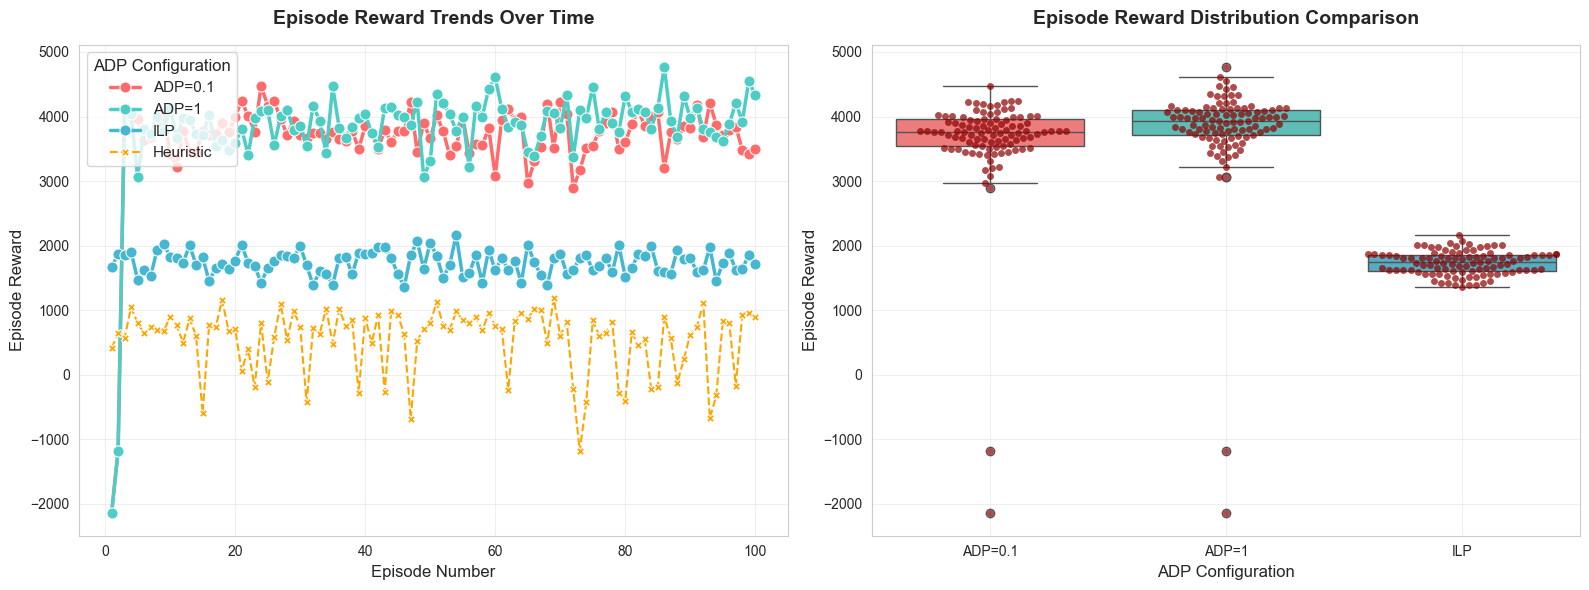

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.facecolor'] = 'white'
data_0_1 = data_list[0]
data_1_1 =  data_list[-1]
data_0_1 = data_0_1
data_1_1 = data_1_1
# Prepare data for visualization (unchanged)
data_for_plot = []
adp_0_5 = data_0_1
adp_1 = data_1_1
adp_0_h = adp_h
# Add ADP=0 data

# Add ADP=0.5 data
for i, reward in enumerate(adp_0_5['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': f'ADP=0.1',
        'ADP_Numeric': 0.5
    })

# Add ADP=1 data
for i, reward in enumerate(adp_1['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': f'ADP=1',
        'ADP_Numeric': 1
    })


for i, reward in enumerate(adp_0['episode_reward']):
    data_for_plot.append({
        'Episode': i + 1,
        'Episode_Reward': reward,
        'ADP_Value': f'ILP',
        'ADP_Numeric': 0
    })
    
# Convert to DataFrame
plot_df = pd.DataFrame(data_for_plot)

# Create two comparison plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# fig.suptitle('Impact of ADP Value on Episode Reward Performance', fontsize=18, fontweight='bold', y=1.02)

# Color palette for consistency
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# 1. Line plot: Episode reward trends over time (modified for clarity)
ax1 = axes[0]
sns.lineplot(data=plot_df, x='Episode', y='Episode_Reward', hue='ADP_Value', 
             marker='o', markersize=8, linewidth=2.5, ax=ax1, palette=colors)
sns.lineplot(data=adp_0_h, x=adp_0_h.index+1, y='episode_reward', 
             label='Heuristic', color='orange', linestyle='--', linewidth=1.5, 
             marker='X', markersize=6, ax=ax1)
ax1.set_title('Episode Reward Trends Over Time', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Episode Number', fontsize=12)
ax1.set_ylabel('Episode Reward', fontsize=12)
ax1.legend(title='ADP Configuration', title_fontsize=12, fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Box plot with swarm: Reward distribution comparison (unchanged)
ax2 = axes[1]
sns.boxplot(data=plot_df, x='ADP_Value', y='Episode_Reward', ax=ax2, palette=colors)
sns.swarmplot(data=plot_df, x='ADP_Value', y='Episode_Reward', 
              color='darkred', alpha=0.7, size=5, ax=ax2)
ax2.set_title('Episode Reward Distribution Comparison', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('ADP Configuration', fontsize=12)
ax2.set_ylabel('Episode Reward', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [24]:
episode_reward_list_mbest = episode_reward_list.index(max(episode_reward_list))
episode_reward_list_mbest

4

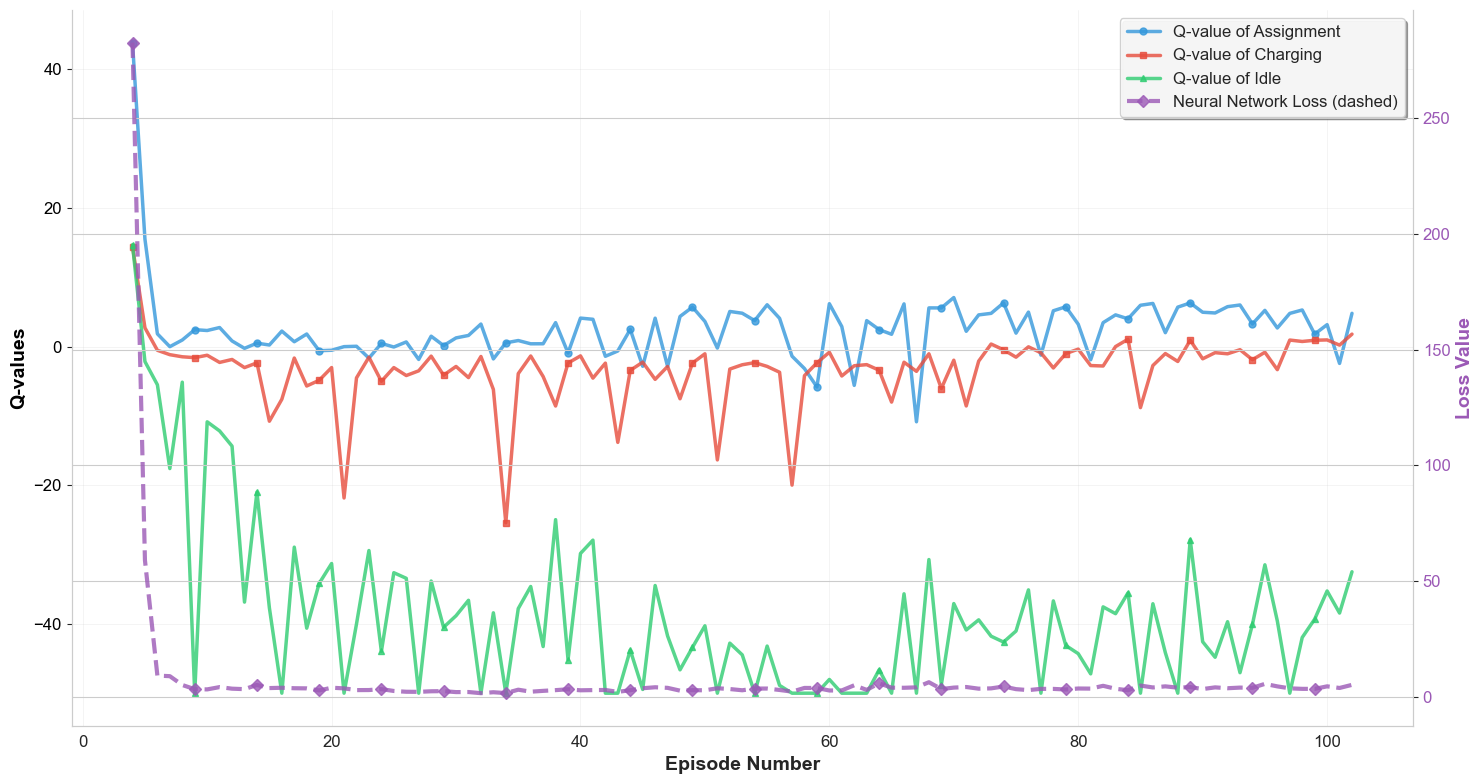

Q-VALUES AND LOSS ANALYSIS SUMMARY

📊 Q-Value Statistics:
   Assignment Q-value: Mean=2.6745, Range=[-10.8556, 43.8454]
   Charging Q-value:   Mean=-3.2730, Range=[-25.4246, 14.4254]
   Idle Q-value:       Mean=-38.6523, Range=[-50.0000, 14.6808]

🔻 Neural Network Loss:
   Initial Loss:  282.683012
   Final Loss:    5.214722
   Loss Reduction: 98.16%

💡 Key Observations:
   • Neural network loss shows convergence trend (dashed purple line)
   • Q-values demonstrate learning patterns across different actions
   • Dual y-axis design allows comparison of different scale metrics
   • Loss starts from episode 2, aligning with neural network training schedule


In [25]:
episode_reward_list_mbest = episode_reward_list.index(max(episode_reward_list))
episode_reward_list_mbest
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['figure.facecolor'] = 'white'

# 创建双y轴图表
fig, ax1 = plt.subplots(figsize=(15, 8))
adp_0_1 = data_list[episode_reward_list_mbest]
adp_0_1 = adp_0_1[adp_0_1['neural_network_loss']>0]
# 定义颜色
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']  # 蓝色、红色、绿色、紫色

# 绘制Q值曲线（左y轴）
episodes = range(4, len(adp_0_1) + 4)

ax1.plot(episodes, adp_0_1['sample_assign_q_value'], 
         color=colors[0], linestyle='-', linewidth=2.5, 
         marker='o', markersize=5, alpha=0.8, markevery=5,
         label='Q-value of Assignment')

ax1.plot(episodes, adp_0_1['sample_charge_q_value'], 
         color=colors[1], linestyle='-', linewidth=2.5, 
         marker='s', markersize=5, alpha=0.8, markevery=5,
         label='Q-value of Charging')

ax1.plot(episodes, adp_0_1['sample_idle_q_value'], 
         color=colors[2], linestyle='-', linewidth=2.5, 
         marker='^', markersize=5, alpha=0.8, markevery=5,
         label='Q-value of Idle')

# 设置左y轴
ax1.set_xlabel('Episode Number', fontsize=14, fontweight='bold')
ax1.set_ylabel('Q-values', fontsize=14, fontweight='bold', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# 创建右y轴用于损失函数
ax2 = ax1.twinx()

# 绘制损失函数（虚线，从第二个数据点开始）
loss_data = adp_0_1['neural_network_loss']
loss_episodes = range(4, len(adp_0_1) + 4)  # x轴从4开始

ax2.plot(loss_episodes, loss_data, 
         color=colors[3], linestyle='--', linewidth=3, 
         marker='D', markersize=6, alpha=0.8, markevery=5,
         label='Neural Network Loss (dashed)')

# 设置右y轴
ax2.set_ylabel('Loss Value', fontsize=14, fontweight='bold', color=colors[3])
ax2.tick_params(axis='y', labelcolor=colors[3])

# 设置图表标题
# plt.title('Q-values and Neural Network Loss Over Episodes\n(ADP=0.1 Training Progress)', 
#           fontsize=16, fontweight='bold', pad=20)

# 合并图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='best', fontsize=12, frameon=True, 
           fancybox=True, shadow=True, framealpha=0.9)

# 添加网格
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 设置坐标轴样式
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# 调整布局
plt.tight_layout()
plt.show()

# 输出统计分析
print("="*80)
print("Q-VALUES AND LOSS ANALYSIS SUMMARY")
print("="*80)

print(f"\n📊 Q-Value Statistics:")
print(f"   Assignment Q-value: Mean={adp_0_1['sample_assign_q_value'].mean():.4f}, "
      f"Range=[{adp_0_1['sample_assign_q_value'].min():.4f}, {adp_0_1['sample_assign_q_value'].max():.4f}]")
print(f"   Charging Q-value:   Mean={adp_0_1['sample_charge_q_value'].mean():.4f}, "
      f"Range=[{adp_0_1['sample_charge_q_value'].min():.4f}, {adp_0_1['sample_charge_q_value'].max():.4f}]")
print(f"   Idle Q-value:       Mean={adp_0_1['sample_idle_q_value'].mean():.4f}, "
      f"Range=[{adp_0_1['sample_idle_q_value'].min():.4f}, {adp_0_1['sample_idle_q_value'].max():.4f}]")

print(f"\n🔻 Neural Network Loss:")
print(f"   Initial Loss:  {loss_data.iloc[0]:.6f}")
print(f"   Final Loss:    {loss_data.iloc[-1]:.6f}")
print(f"   Loss Reduction: {((loss_data.iloc[0] - loss_data.iloc[-1]) / loss_data.iloc[0] * 100):.2f}%")

print(f"\n💡 Key Observations:")
print(f"   • Neural network loss shows convergence trend (dashed purple line)")
print(f"   • Q-values demonstrate learning patterns across different actions")
print(f"   • Dual y-axis design allows comparison of different scale metrics")
print(f"   • Loss starts from episode 2, aligning with neural network training schedule")

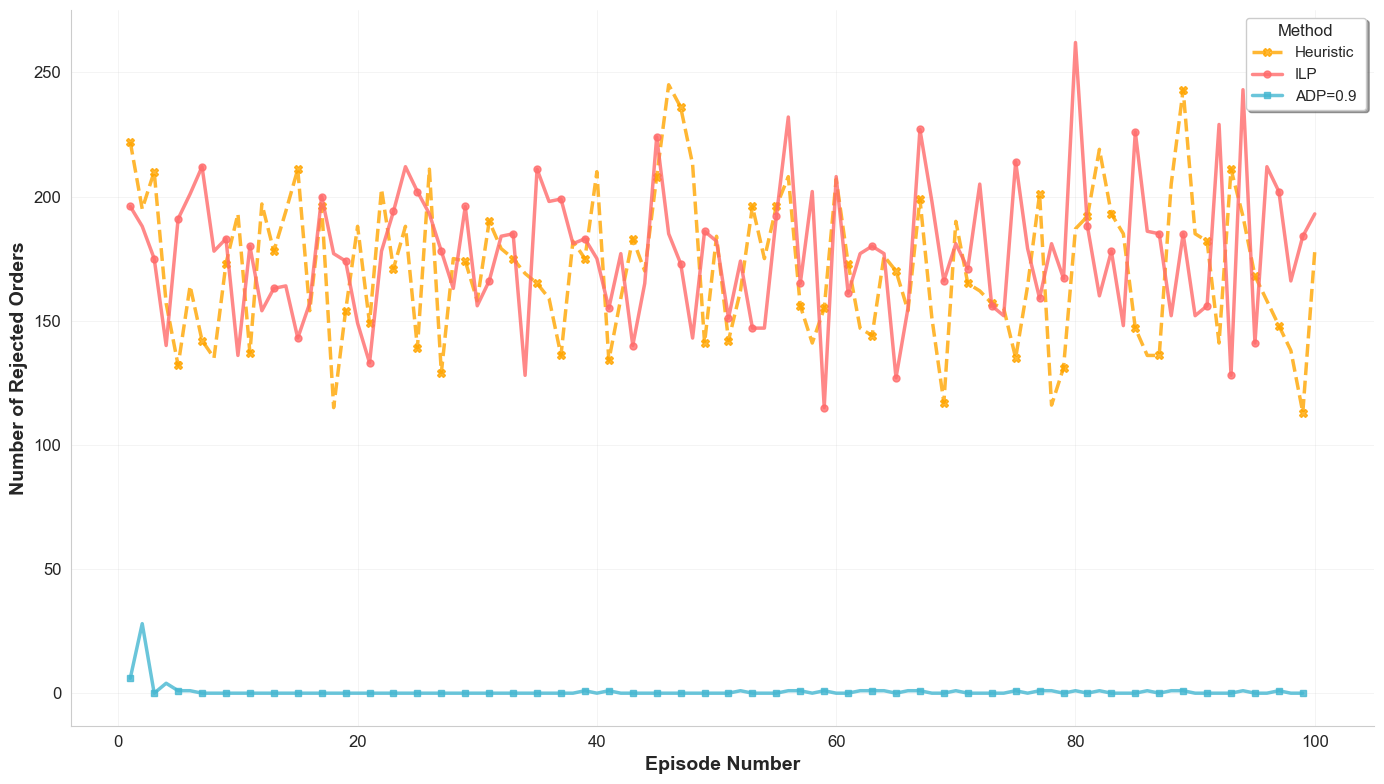

REJECTED ORDERS ANALYSIS SUMMARY

📊 Rejected Orders Statistics:
   Heuristic:        Mean=171.59, Total=17159, Range=[113, 245]
   ADP=0.0:          Mean=177.48, Total=17748, Range=[115, 262]
   ADP=0.9 (Best): Mean=0.63, Total=62, Range=[0, 28]

📈 Performance Improvements:
   ADP=0.0 vs Heuristic: 3.4% increase in rejected orders
   Best ADP vs Heuristic: 99.6% reduction in rejected orders
   Best ADP vs ADP=0.0: 99.6% reduction in rejected orders

💡 Key Observations:
   • Lower rejected orders indicate better assignment efficiency
   • Neural network learning can improve request acceptance rates
   • Comparison shows evolution of rejection behavior across episodes


In [27]:
# 比较三个表格的rejected_orders列变化 - 折线图
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# 创建图表
fig, ax = plt.subplots(figsize=(14, 8))

# 准备数据并绘制折线图
# Heuristic方法 (adp_h)
episodes_h = range(1, len(adp_h) + 1)
ax.plot(episodes_h, adp_h['rejected_orders'], 
        color='orange', linestyle='--', linewidth=2.5, 
        marker='X', markersize=6, alpha=0.8, markevery=2,
        label='Heuristic')

# ADP=0 (adp_0)  
episodes_0 = range(1, len(adp_0) + 1)
ax.plot(episodes_0, adp_0['rejected_orders'], 
        color='#FF6B6B', linestyle='-', linewidth=2.5, 
        marker='o', markersize=5, alpha=0.8, markevery=2,
        label='ILP')

# 最佳ADP权重的数据 (使用之前找到的最佳权重)
best_adp_data = data_list[episode_reward_list_mbest]
best_adp_data = best_adp_data[best_adp_data['neural_network_loss'] > 0]
best_weight = weights[episode_reward_list_mbest]

episodes_best = range(1, len(best_adp_data) + 1)
ax.plot(episodes_best, best_adp_data['rejected_orders'], 
        color='#45B7D1', linestyle='-', linewidth=2.5, 
        marker='s', markersize=5, alpha=0.8, markevery=2,
        label=f'ADP={best_weight} ')

# 设置图表属性
# ax.set_title('Rejected Orders Comparison Across Different Methods', 
#              fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Episode Number', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Rejected Orders', fontsize=14, fontweight='bold')

# 设置图例
ax.legend(title='Method', title_fontsize=12, fontsize=11, 
          loc='upper right', frameon=True, fancybox=True, shadow=True)

# 添加网格
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 美化坐标轴
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# 输出统计信息
print("="*80)
print("REJECTED ORDERS ANALYSIS SUMMARY")
print("="*80)

print(f"\n📊 Rejected Orders Statistics:")
print(f"   Heuristic:        Mean={adp_h['rejected_orders'].mean():.2f}, "
      f"Total={adp_h['rejected_orders'].sum()}, "
      f"Range=[{adp_h['rejected_orders'].min()}, {adp_h['rejected_orders'].max()}]")

print(f"   ADP=0.0:          Mean={adp_0['rejected_orders'].mean():.2f}, "
      f"Total={adp_0['rejected_orders'].sum()}, "
      f"Range=[{adp_0['rejected_orders'].min()}, {adp_0['rejected_orders'].max()}]")

print(f"   ADP={best_weight} (Best): Mean={best_adp_data['rejected_orders'].mean():.2f}, "
      f"Total={best_adp_data['rejected_orders'].sum()}, "
      f"Range=[{best_adp_data['rejected_orders'].min()}, {best_adp_data['rejected_orders'].max()}]")

# 计算改善幅度
heuristic_mean = adp_h['rejected_orders'].mean()
adp0_mean = adp_0['rejected_orders'].mean()
best_mean = best_adp_data['rejected_orders'].mean()

print(f"\n📈 Performance Improvements:")
if adp0_mean < heuristic_mean:
    improvement_0 = ((heuristic_mean - adp0_mean) / heuristic_mean) * 100
    print(f"   ADP=0.0 vs Heuristic: {improvement_0:.1f}% reduction in rejected orders")
else:
    degradation_0 = ((adp0_mean - heuristic_mean) / heuristic_mean) * 100
    print(f"   ADP=0.0 vs Heuristic: {degradation_0:.1f}% increase in rejected orders")

if best_mean < heuristic_mean:
    improvement_best = ((heuristic_mean - best_mean) / heuristic_mean) * 100
    print(f"   Best ADP vs Heuristic: {improvement_best:.1f}% reduction in rejected orders")
else:
    degradation_best = ((best_mean - heuristic_mean) / heuristic_mean) * 100
    print(f"   Best ADP vs Heuristic: {degradation_best:.1f}% increase in rejected orders")

if best_mean < adp0_mean:
    improvement_vs_0 = ((adp0_mean - best_mean) / adp0_mean) * 100
    print(f"   Best ADP vs ADP=0.0: {improvement_vs_0:.1f}% reduction in rejected orders")
else:
    degradation_vs_0 = ((best_mean - adp0_mean) / adp0_mean) * 100
    print(f"   Best ADP vs ADP=0.0: {degradation_vs_0:.1f}% increase in rejected orders")

print(f"\n💡 Key Observations:")
print(f"   • Lower rejected orders indicate better assignment efficiency")
print(f"   • Neural network learning can improve request acceptance rates")
print(f"   • Comparison shows evolution of rejection behavior across episodes")

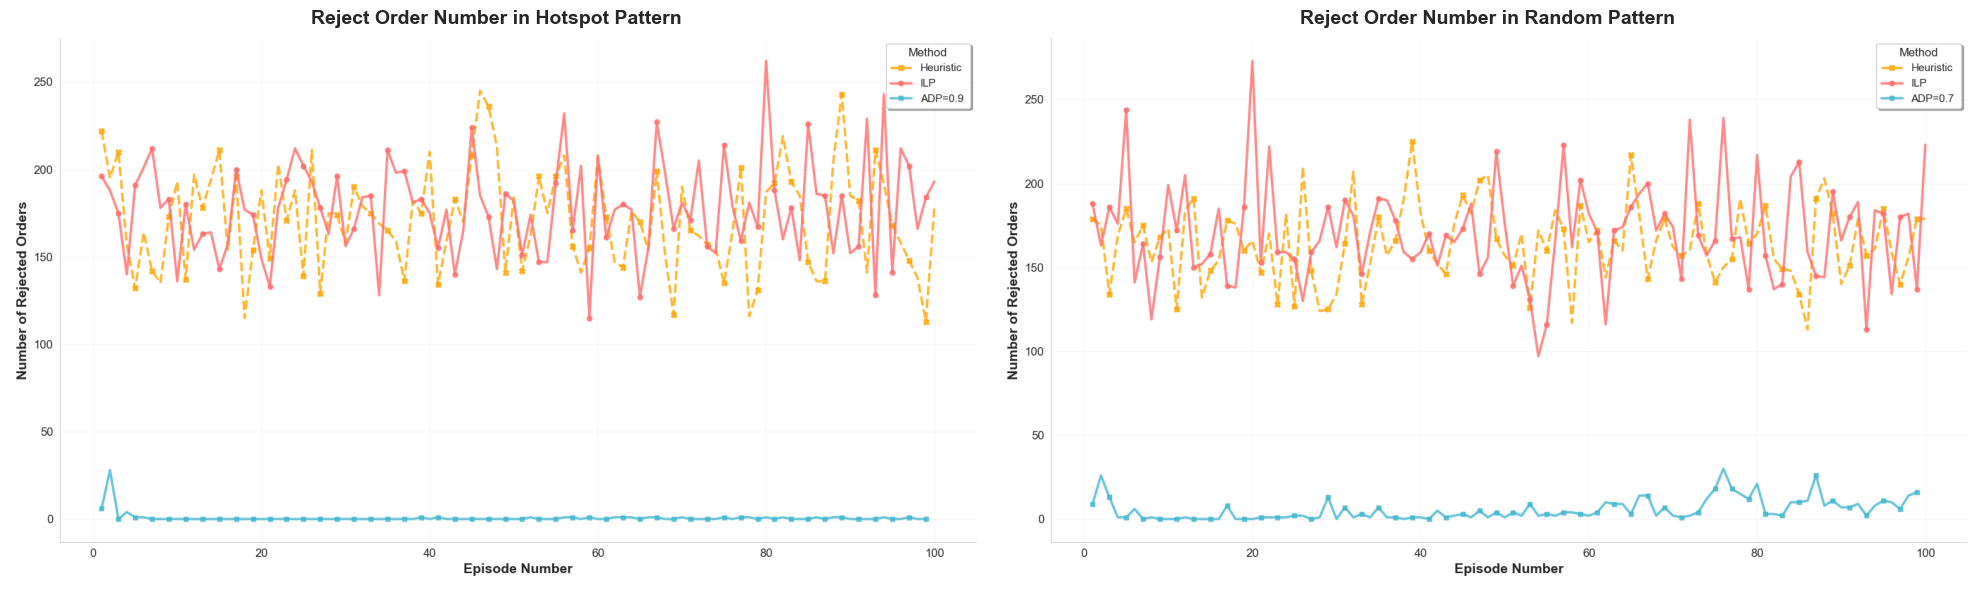

In [28]:
import matplotlib.image as mpimg
container_file = r'C:\Users\19513\Downloads\reject_intense.png'
waittime_file = r'C:\Users\19513\Downloads\reject_random.png'


# 读取图片
container_img = mpimg.imread(container_file)
waittime_img = mpimg.imread(waittime_file)

# 创建一行两列的子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 显示图片
ax1.imshow(container_img)
ax1.set_title('Reject Order Number in Hotspot Pattern', fontsize=14, fontweight='bold')
ax1.axis('off')  # 关闭坐标轴

ax2.imshow(waittime_img)
ax2.set_title('Reject Order Number in Random Pattern', fontsize=14, fontweight='bold')
ax2.axis('off')  # 关闭坐标轴

# 添加总标题
# fig.suptitle(f'Benchmark Scan (Demand={demand_val}, ε={container_ep}, {wait_ep})',
#             fontsize=16, fontweight='bold')

# 调整子图间距
plt.tight_layout()

# 显示图片
plt.show()


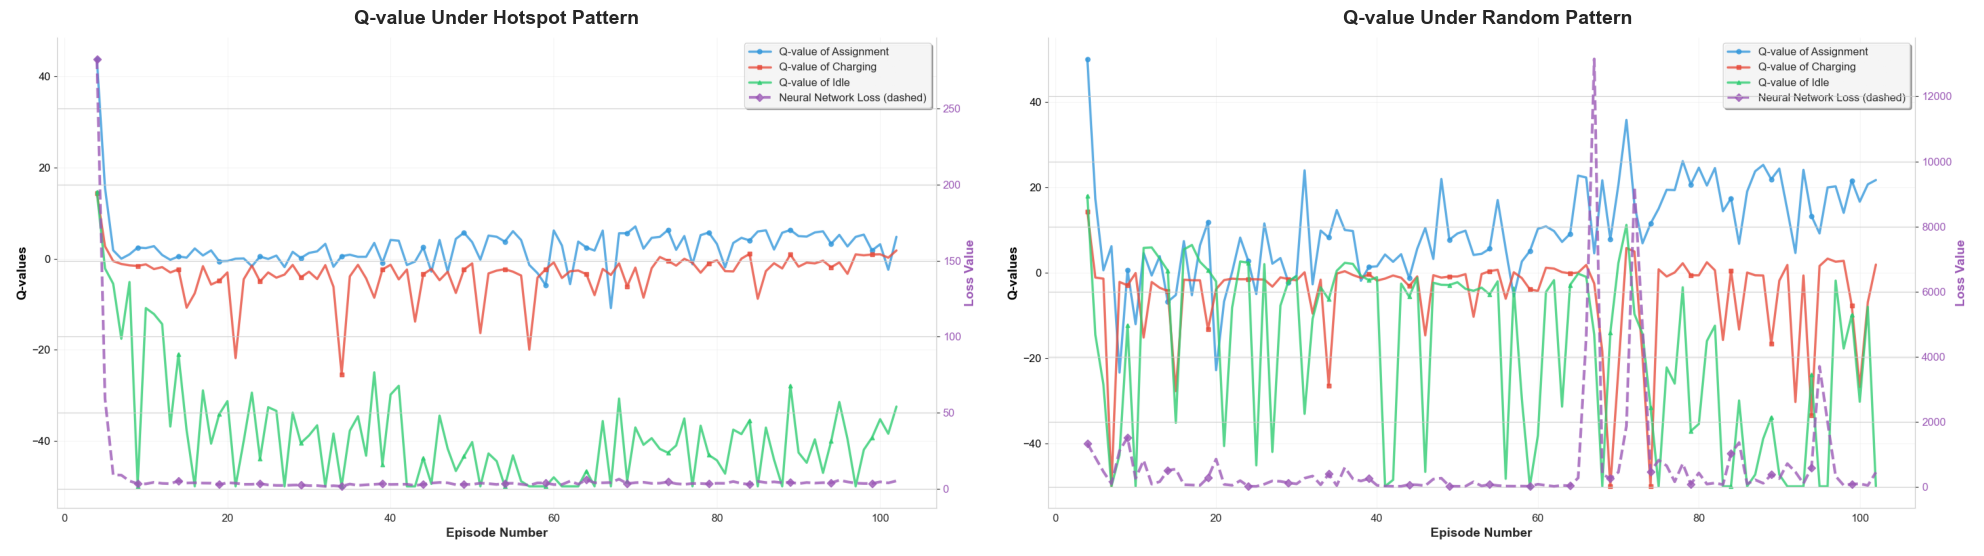

In [29]:
import matplotlib.image as mpimg
container_file = r'C:\Users\19513\Downloads\q_result_h.png'
waittime_file = r'C:\Users\19513\Downloads\q_result_r.png'


# 读取图片
container_img = mpimg.imread(container_file)
waittime_img = mpimg.imread(waittime_file)

# 创建一行两列的子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 显示图片
ax1.imshow(container_img)
ax1.set_title('Q-value Under Hotspot Pattern', fontsize=14, fontweight='bold')
ax1.axis('off')  # 关闭坐标轴

ax2.imshow(waittime_img)
ax2.set_title('Q-value Under Random Pattern', fontsize=14, fontweight='bold')
ax2.axis('off')  # 关闭坐标轴

# 添加总标题
# fig.suptitle(f'Benchmark Scan (Demand={demand_val}, ε={container_ep}, {wait_ep})',
#             fontsize=16, fontweight='bold')

# 调整子图间距
plt.tight_layout()

# 显示图片
plt.show()
